ACOCADO PROJECT - PRICE AND REGION PPREDICTION

Since, this is both a Classification as well as Regression project, we import libraries accordingly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

Import Dataset from GitHub

In [2]:
df = pd.read_csv("C:\\Users\\adwit\\Downloads\\avocado.csv\\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(18249, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Null Columns

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Looking at our standard deviation, we can notice there is some skewness in our data, there must be some outliers

In [7]:
df = df.drop_duplicates()
df.shape

(18249, 14)

Remove Unncessary Columns

No nulls, or duplicates.

In [8]:
df = df.drop(columns = ['Date','Unnamed: 0'], axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Removed 'Date' column as well, since we already have Year column and we need to avoid overfitting

Now, let's convert the categoricals columns to float columns

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab = LabelEncoder()

In [11]:
df['type'] = lab.fit_transform(df['type'])
df['region'] = lab.fit_transform(df['region'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Now that we have cleaned our dataset, let's begin with the visualization

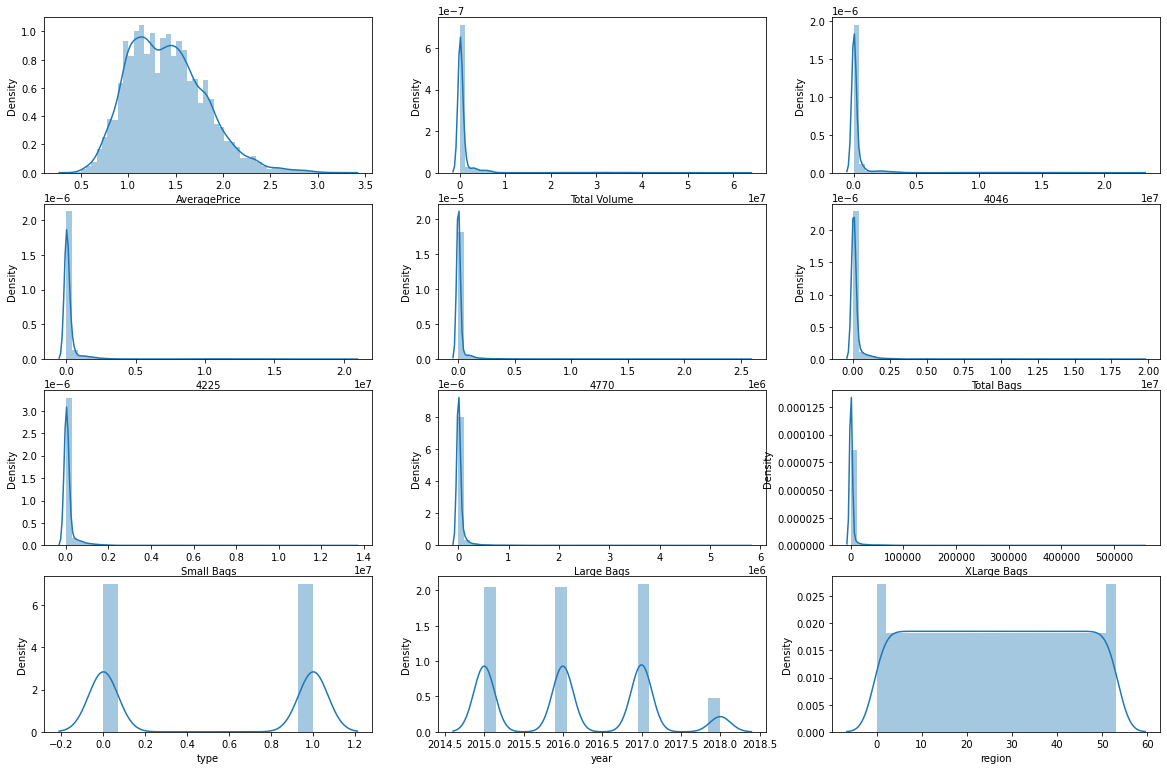

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

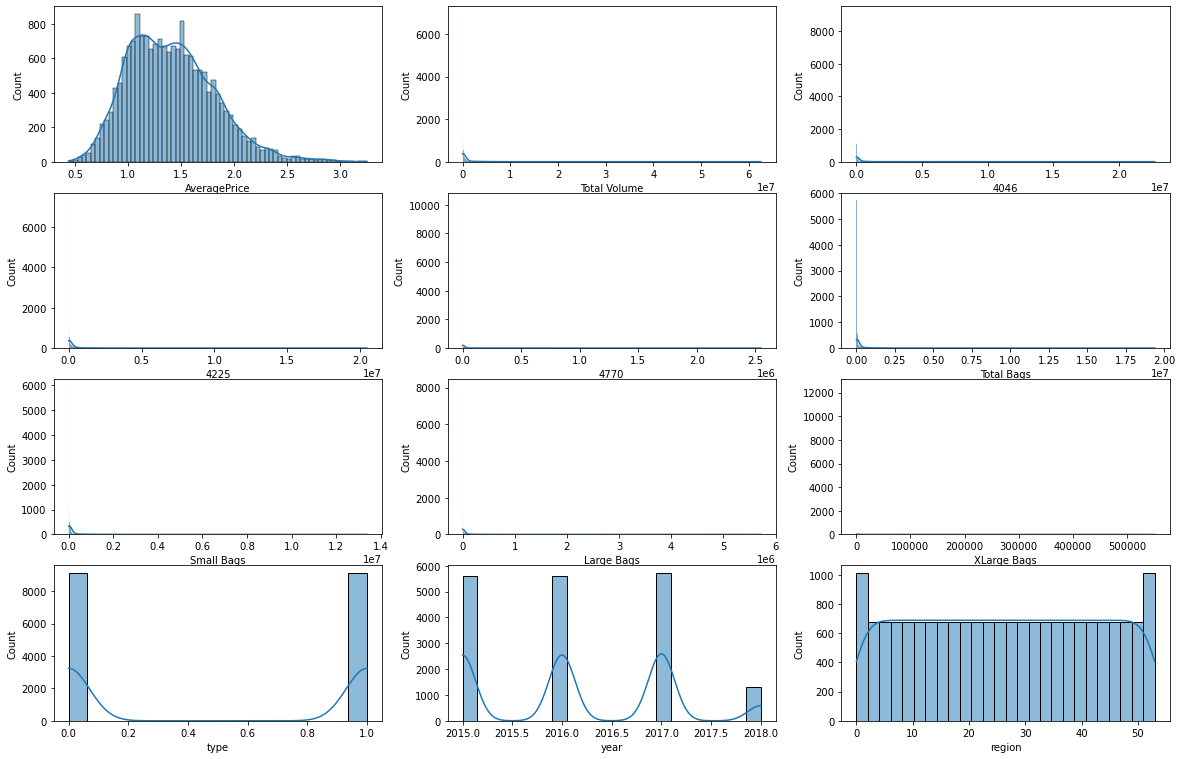

In [13]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(6,3,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

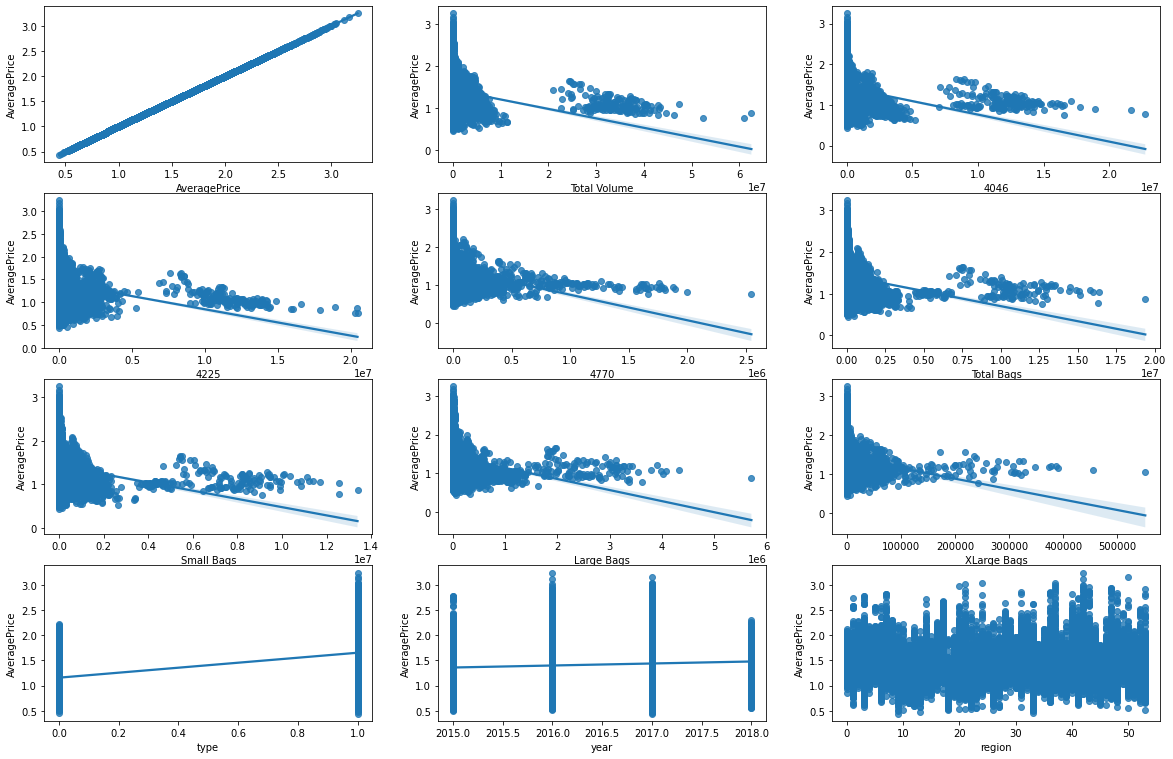

In [14]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(x=column,y='AveragePrice',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

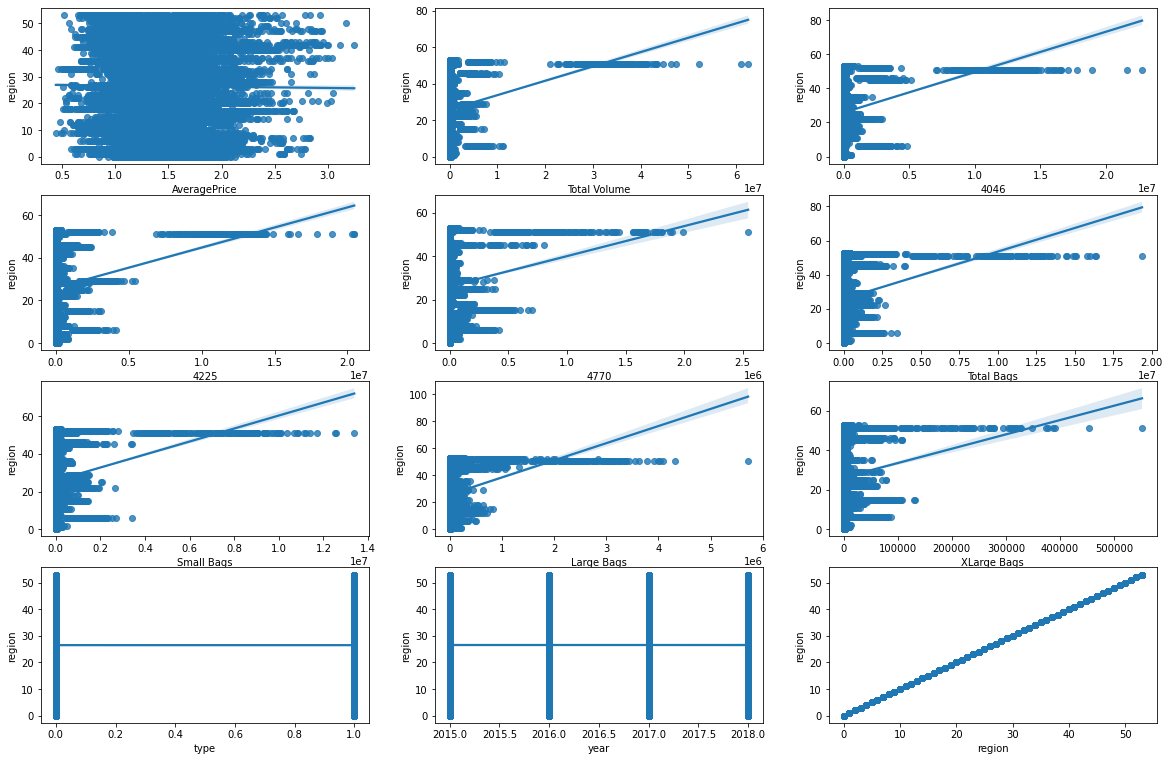

In [15]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(x=column,y='region',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Let's check the heatmap for any multi-collinearity problems

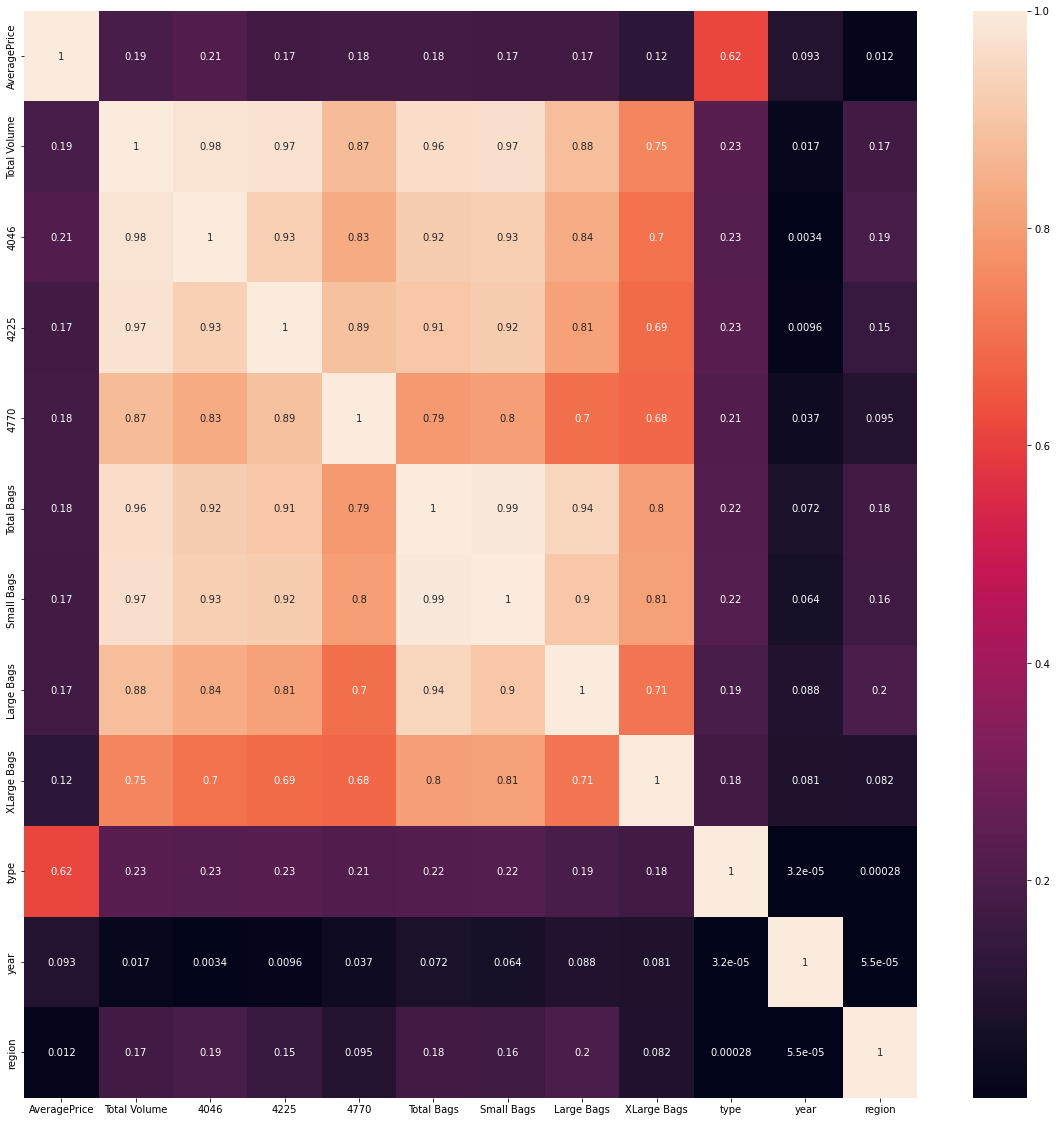

In [16]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

We need to remove 'Small Bags' column to reduce collinearity (it has high collinearity with 2 columns)

In [17]:
df = df.drop(columns = ['Small Bags'], axis = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,53


In [18]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

We need to now seperate our Classification and Regression Datasets

In [19]:
df_class = df

In [20]:
df_reg = df

Now, let's first try on our Regression dataset

In [21]:
x_reg = df.drop(columns = ['AveragePrice'])
y_reg = df.AveragePrice

In [22]:
x_reg

,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,53


In [23]:
y_reg

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

Now that we have removed outliers, use Power Transformer to reduce skewness

In [24]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [25]:
x_reg_scaled = scaler.fit_transform(x_reg.values)
x_reg_scaled

array([[-0.08660524, -0.65861896,  0.30731294, ..., -0.99983562,
        -1.22189489, -2.01155231],
       [-0.15574567, -0.77686953,  0.23164739, ..., -0.99983562,
        -1.22189489, -2.01155231],
       [ 0.17932662, -0.73194656,  0.57950332, ..., -0.99983562,
        -1.22189489, -2.01155231],
       ...,
       [-0.77150535, -0.61983119, -0.77249619, ...,  1.00016441,
         1.96854784,  1.54383806],
       [-0.69807719, -0.55028196, -0.71054316, ...,  1.00016441,
         1.96854784,  1.54383806],
       [-0.66380937, -0.36790819, -0.78517306, ...,  1.00016441,
         1.96854784,  1.54383806]])

Now, we use PCA to perform dimension reduction for our model

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()

In [28]:
pca.fit_transform(x_reg_scaled)

array([[-0.70395646, -1.65890137,  1.97968387, ...,  0.76452961,
         0.04793336,  0.03962094],
       [-0.76784268, -1.64043001,  1.9945707 , ...,  0.73273692,
        -0.03960461,  0.01787853],
       [-0.44329329, -1.72680244,  1.99947833, ...,  0.82619278,
         0.14538853,  0.21187788],
       ...,
       [-1.53816103,  1.81020088, -1.35027439, ..., -0.83907426,
         0.14911349, -0.03314829],
       [-1.42559289,  1.81361247, -1.36275921, ..., -0.8226126 ,
         0.14148717, -0.03030229],
       [-1.49960696,  1.82993546, -1.38684655, ..., -0.75213167,
         0.09359595, -0.04572008]])

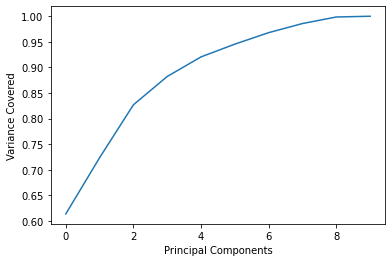

In [29]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 7 components to cover about 99% of variance

In [30]:
pca = PCA (n_components = 7)
new_pcomp_reg = pca.fit_transform(x_reg_scaled)
princi_comp_reg = pd.DataFrame(new_pcomp_reg, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
princi_comp_reg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.703956,-1.658901,1.979684,-0.303928,0.543881,-0.501762,0.321437
1,-0.767843,-1.640430,1.994571,-0.287022,0.496292,-0.603101,0.281884
2,-0.443293,-1.726802,1.999478,-0.354337,0.650628,-0.570028,0.048223
3,-0.623942,-1.696974,1.975807,-0.335790,0.530692,-0.544026,0.256051
4,-0.746309,-1.647522,1.972247,-0.338139,0.390524,-0.655458,0.333898
...,...,...,...,...,...,...,...
18244,-1.863287,2.236957,-1.496502,0.265687,0.480741,0.149885,0.186065
18245,-1.943963,2.187304,-1.463546,0.319250,0.509571,0.078498,-0.004349
18246,-1.538161,1.810201,-1.350274,0.756406,0.993768,-0.532910,-0.761769
18247,-1.425593,1.813612,-1.362759,0.703482,1.018139,-0.476726,-0.758394


In [31]:
princi_comp_reg.skew()

PC1    0.187722
PC2    0.116268
PC3    0.224175
PC4   -0.000189
PC5    0.489414
PC6    0.121402
PC7    0.182019
dtype: float64

Not using Dimension Reduction is giving better accuracy, therefore I'll be avoiding it while model training and testing

In [47]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(x_reg_scaled,y_reg,test_size=0.25,random_state=42)

In [48]:
lr = LinearRegression()
lr.fit(x_train_reg,y_train_reg)

LinearRegression()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
def metric_score(clf,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True):
    if train:
        y_pred_reg = clf.predict(x_train_reg)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train_reg,y_pred_reg)*100:.2f}%')
        
    elif train == False:
        pred_reg = clf.predict(x_test_reg)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test_reg,pred_reg)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_reg,y_reg,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test_reg,pred_reg))
        print('MSE = ',mean_squared_error(y_test_reg,pred_reg))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test_reg,pred_reg)))

In [51]:
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 51.76%

 ======TESTING RESULT======
Accuracy Score: 50.12%
Cross Validation Score =  -8.26881715636867
MAE =  0.2217428614223651
MSE =  0.08045442670882424
RMSE =  0.2836448954393931


We can note that we are getting training accuracy of 51.7% and Testing accuracy of 50.12% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [52]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
xgb = XGBRegressor()

In [53]:
#TRAINING THE MODELS
knn.fit(x_train_reg,y_train_reg)
dec.fit(x_train_reg,y_train_reg)
ran.fit(x_train_reg,y_train_reg)
xgb.fit(x_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Testing accuracies for other models

In [54]:
print(lr.score(x_test_reg,y_test_reg))
print(knn.score(x_test_reg,y_test_reg))
print(dec.score(x_test_reg,y_test_reg))
print(ran.score(x_test_reg,y_test_reg))
print(xgb.score(x_test_reg,y_test_reg))

0.5012089502944561
0.8296531242882104
0.6801832055748773
0.8431423384846746
0.8242887883774128


We can note, KNN, Random Forest and XGB is by far our best performing model.

Now we need to check for overfitting

I'll be using Ridge regularization for this

In [55]:
from sklearn.linear_model import Ridge, RidgeCV

In [57]:
ridgecv = RidgeCV(alphas = np.arange(0.001,10,0.01),normalize=True)
ridgecv.fit(x_train_reg,y_train_reg)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       9.661e+00, 9.671e+00, 9.681e+00, 9.691e+00, 9.701e+00, 9.711e+00,
       9.721e+00, 9.731e+00, 9.741e+00, 9.751e+00, 9.761e+00, 9.771e+00,
       9.781e+00, 9.791e+00, 9.801e+00, 9.811e+00, 9.821e+00, 9.831e+00,
       9.841e+00, 9.851e+00, 9.861e+00, 9.871e+00, 9.881e+00, 9.891e+00,
       9.901e+00, 9.911e+00, 9.921e+00, 9.931e+00, 9.941e+00, 9.951e+00,
       9.961e+00, 9.971e+00, 9.981e+00, 9.991e+00]),
        normalize=True)

In [58]:
ridgecv.alpha_

0.001

In [59]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_reg,y_train_reg)

Ridge(alpha=0.001)

In [60]:
ridge_model.score(x_test_reg,y_test_reg)

0.501208951683275

We get very similar score to our R2 score, thus we can conclude, model is not overfitting.

Now, we perform Hyper Parameter Tuning on our best performing model, i.e., Random Forest Model

In [69]:
params = {'n_estimators':[2,50],
         'max_depth':[2,20],
         'min_samples_split':[2,20],
         'min_samples_leaf':[2,20]}

In [70]:
grid_reg = GridSearchCV(ran, param_grid = params)
grid_reg.fit(x_train_reg,y_train_reg)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 20], 'min_samples_leaf': [2, 20],
                         'min_samples_split': [2, 20],
                         'n_estimators': [2, 50]})

In [71]:
print('best parameters: ',grid_reg.best_params_)

best parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [72]:
ran_grid = grid_reg.best_estimator_
ran_grid.fit(x_train_reg,y_train_reg)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=50)

In [73]:
metric_score(ran_grid,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(ran_grid,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 96.23%

 ======TESTING RESULT======
Accuracy Score: 83.83%
Cross Validation Score =  0.23452875059008446
MAE =  0.11383248319830906
MSE =  0.02607639952529247
RMSE =  0.16148188605937344


In [74]:
metric_score(ran,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(ran,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 97.79%

 ======TESTING RESULT======
Accuracy Score: 84.31%
Cross Validation Score =  0.2369009808996724
MAE =  0.11178422090729782
MSE =  0.02530096167433706
RMSE =  0.15906276017452062


We get better accuracy without tuning, thus we'll keep our original Random Forest Model

Now, we move to our classification model

In [75]:
x_cl = df.drop(columns = ['region'])
y_cl = df.region

In [76]:
x_cl

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018


In [77]:
y_cl

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

Use Power Transformer to reduce skewness

In [78]:
x_cl_scaled = scaler.fit_transform(x_cl.values)
x_cl_scaled

array([[-0.08624822, -0.08660524, -0.65861896, ..., -0.69984934,
        -0.99983562, -1.22189489],
       [-0.03402196, -0.15574567, -0.77686953, ..., -0.69984934,
        -0.99983562, -1.22189489],
       [-1.27393796,  0.17932662, -0.73194656, ..., -0.69984934,
        -0.99983562, -1.22189489],
       ...,
       [ 1.14779044, -0.77150535, -0.61983119, ..., -0.69984934,
         1.00016441,  1.96854784],
       [ 1.2658763 , -0.69807719, -0.55028196, ..., -0.69984934,
         1.00016441,  1.96854784],
       [ 0.61828746, -0.66380937, -0.36790819, ..., -0.69984934,
         1.00016441,  1.96854784]])

Now, we use PCA to perform dimension reduction for our model

In [79]:
pca = PCA()

In [80]:
pca.fit_transform(x_cl_scaled)

array([[-0.5465299 , -1.5272493 , -0.24984941, ...,  0.78647089,
        -0.04530809,  0.059204  ],
       [-0.62179081, -1.50171118, -0.27143514, ...,  0.75168539,
        -0.13377639,  0.03891165],
       [ 0.01660204, -1.85719603,  0.48670009, ...,  0.9344559 ,
         0.31599729,  0.19749426],
       ...,
       [-1.87981015,  1.84586367, -0.57231047, ..., -0.95054843,
         0.22736898, -0.05006736],
       [-1.80227154,  1.88636075, -0.65509436, ..., -0.93372761,
         0.19619353, -0.04343314],
       [-1.70306075,  1.72946397, -0.1560548 , ..., -0.8165804 ,
         0.24045411, -0.07237529]])

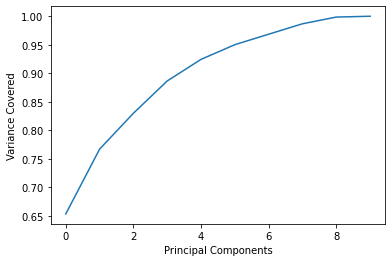

In [81]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 7 components to cover about 99% of variance

In [82]:
pca = PCA (n_components = 7)
new_pcomp_cl = pca.fit_transform(x_cl_scaled)
princi_comp_cl = pd.DataFrame(new_pcomp_cl, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
princi_comp_cl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.546530,-1.527249,-0.249849,0.201101,0.589754,-0.706975,0.503611
1,-0.621791,-1.501711,-0.271435,0.217379,0.542602,-0.812631,0.471668
2,0.016602,-1.857196,0.486700,0.629894,0.788918,-0.812386,0.008560
3,-0.283589,-1.730909,0.229284,0.475413,0.640097,-0.740117,0.323254
4,-0.552081,-1.556702,-0.099042,0.264496,0.458363,-0.835840,0.525685
...,...,...,...,...,...,...,...
18244,-2.058523,2.055592,0.467718,0.050707,0.510176,0.394916,0.073177
18245,-2.183615,2.057949,0.249108,-0.014333,0.503092,0.253419,0.050778
18246,-1.879810,1.845864,-0.572310,-0.012654,0.894139,-0.416399,-0.593439
18247,-1.802272,1.886361,-0.655094,-0.134521,0.899699,-0.371830,-0.561651


In [83]:
princi_comp_cl.skew()

PC1    0.165214
PC2    0.096240
PC3    0.213944
PC4   -0.207332
PC5    0.541061
PC6    0.041287
PC7    0.266228
dtype: float64

In [84]:
x_train_cl,x_test_cl,y_train_cl,y_test_cl = train_test_split(princi_comp_cl,y_cl,test_size=0.25,random_state=42)

In [86]:
ranc = RandomForestClassifier()
ranc.fit(x_train_cl,y_train_cl)

RandomForestClassifier()

In [87]:
def metric_score_cl(clf,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True):
    if train:
        y_pred_cl = clf.predict(x_train_cl)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train_cl,y_pred_cl)*100:.2f}%')
        
    elif train == False:
        pred_cl = clf.predict(x_test_cl)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test_cl,pred_cl)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test_cl,pred_cl,digits =2))

In [88]:
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 80.41%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.64      0.86      0.73        76
           1       0.67      0.72      0.69        85
           2       0.88      0.96      0.92        80
           3       0.78      0.74      0.76        88
           4       0.84      0.83      0.84        83
           5       0.89      0.78      0.83        94
           6       0.96      0.98      0.97        82
           7       0.81      0.84      0.83        94
           8       0.88      0.88      0.88        90
           9       0.77      0.82      0.79        88
          10       0.66      0.65      0.65        79
          11       0.85      0.93      0.89        85
          12       0.80      0.89      0.84        83
          13       0.74      0.68      0.71        81
          14       0.88      0.84      0.86       

In [92]:
pred_cl = ranc.predict(x_test_cl)

In [93]:
conf_matrix = confusion_matrix(y_test_cl,pred_cl)
conf_matrix

array([[65,  0,  0, ...,  0,  0,  0],
       [ 0, 61,  0, ...,  0,  0,  2],
       [ 0,  0, 77, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ..., 77,  0,  0],
       [ 0,  0,  0, ...,  0, 78,  0],
       [ 0,  1,  2, ...,  0,  0, 62]], dtype=int64)

We can note that we are getting training accuracy of 100% and Testing accuracy of 80.41% with Random Forest model

We should now test the data on other models as well to check which model is giving us the best result

In [94]:
from sklearn.svm import SVC

In [95]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [96]:
#TRAINING THE MODELS
knn.fit(x_train_cl,y_train_cl)
dec.fit(x_train_cl,y_train_cl)
svc.fit(x_train_cl,y_train_cl)
xgb.fit(x_train_cl,y_train_cl)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

Check Testing Accuracies for other models:

In [97]:
print(svc.score(x_test_cl,y_test_cl))
print(knn.score(x_test_cl,y_test_cl))
print(dec.score(x_test_cl,y_test_cl))
print(ranc.score(x_test_cl,y_test_cl))
print(xgb.score(x_test_cl,y_test_cl))

0.6655708963401271
0.7646285338593031
0.6506684198991891
0.8040762656147271
0.7670392285776901


We can note, Random Forest is again our best performing model

Now, we perform Hyper Parameter Tuning on our best performing model, i.e., Random Forest Model

In [98]:
params = {'n_estimators':[2,50],
         'max_depth':[2,20],
         'min_samples_split':[2,20],
         'min_samples_leaf':[2,20]}

In [99]:
grid_cl = GridSearchCV(ranc, param_grid = params)
grid_cl.fit(x_train_cl,y_train_cl)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 20], 'min_samples_leaf': [2, 20],
                         'min_samples_split': [2, 20],
                         'n_estimators': [2, 50]})

In [100]:
print('best parameters: ',grid_cl.best_params_)

best parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [101]:
ranc_grid = grid_cl.best_estimator_
ranc_grid.fit(x_train_cl,y_train_cl)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=50)

In [102]:
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 99.06%

 ======TESTING RESULT======
Accuracy Score: 77.76%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        76
           1       0.61      0.67      0.64        85
           2       0.82      0.93      0.87        80
           3       0.75      0.72      0.73        88
           4       0.80      0.84      0.82        83
           5       0.81      0.70      0.75        94
           6       0.96      0.96      0.96        82
           7       0.83      0.85      0.84        94
           8       0.83      0.84      0.84        90
           9       0.73      0.77      0.75        88
          10       0.62      0.63      0.63        79
          11       0.74      0.85      0.79        85
          12       0.80      0.87      0.83        83
          13       0.70      0.65      0.68        81
          14       0.85      0.78      0.81        

In [103]:
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 80.41%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.64      0.86      0.73        76
           1       0.67      0.72      0.69        85
           2       0.88      0.96      0.92        80
           3       0.78      0.74      0.76        88
           4       0.84      0.83      0.84        83
           5       0.89      0.78      0.83        94
           6       0.96      0.98      0.97        82
           7       0.81      0.84      0.83        94
           8       0.88      0.88      0.88        90
           9       0.77      0.82      0.79        88
          10       0.66      0.65      0.65        79
          11       0.85      0.93      0.89        85
          12       0.80      0.89      0.84        83
          13       0.74      0.68      0.71        81
          14       0.88      0.84      0.86       

Again, we get higher accuracy without hyperparameter tuning, thus we go ahead with our original Random Forest Classifier Model for predictions.